In [10]:
"""
    Assignment 7
        Class: Intro to Data Analysis (CS6850)
        Instructor: Dr. Hamid Karimi
        Date: April 1, 2024
        Student: Paul Semadeni
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree, linear_model

In [11]:
with open("./files/train_office.csv", "r") as file:
    train_office_df = pd.read_csv(file)

train_office_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.18,27.2720,426.0,721.25,0.004793,1
1,2/4/2015 17:51,23.15,27.2675,429.5,714.00,0.004783,1
2,2/4/2015 17:53,23.15,27.2450,426.0,713.50,0.004779,1
3,2/4/2015 17:54,23.15,27.2000,426.0,708.25,0.004772,1
4,2/4/2015 17:55,23.10,27.2000,426.0,704.50,0.004757,1


Depth: 1
[0.95714286 0.98910824 0.93737236 0.99931926 0.99455412] Average: 0.9754993678887484
Depth: 5
[0.32789116 0.95371001 0.89312457 0.9632403  0.33219877] Average: 0.6940329624021154
Depth: 10
[0.32653061 0.95371001 0.80054459 0.9632403  0.33219877] Average: 0.6752448562815188
Depth: 50
[0.32653061 0.95371001 0.7910143  0.97004765 0.33219877] Average: 0.6747002681263111
Depth: 100
[0.32653061 0.95371001 0.87950987 0.9884275  0.33219877] Average: 0.6960753532182105


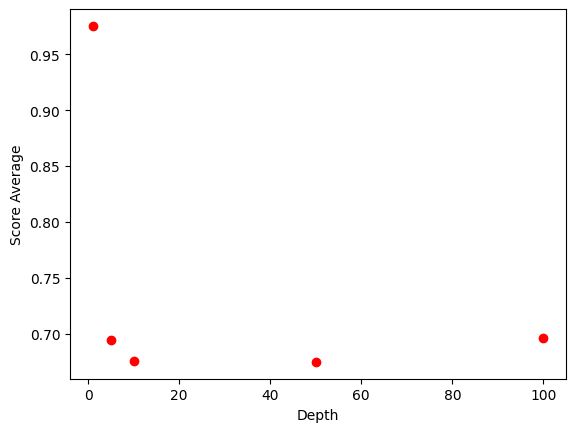

In [12]:
# TODO: (a)	Train the following classifiers (using 5-fold cross-validation) on the train  office.csv file and calculate the average accuracy of the cross-validation for each method given below. Vary the hyperparameters of the classifier and draw a plot that shows the average cross-validation accuracy versus hyperparameter values for each classification method shown below: i.	Decision tree (DT) (maxdepth = 1, 5, 10, 50, 100)
def decision_tree(depths, df,actual=False):
    for depth in depths:
        print("Depth:", depth)
        # We are trying to predict if a room is occupied or not
        Y = df["Occupancy"]
        X = df.drop("Occupancy", axis=1)
        # Convert date to int
        X["date"] = pd.to_datetime(X["date"]).astype("int64")
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = tree.DecisionTreeClassifier(max_depth=depth)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(depth ,avg_score, "ro-")
            plt.xlabel("Depth")
            plt.ylabel("Score Average")
        if actual:
            clf.fit(X,Y)
            Y_pred = clf.predict(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            return conf_mat

depths = [1, 5, 10, 50, 100]
decision_tree(depths, train_office_df)


[0.32789116 0.57181756 0.86317223 0.89448604 0.33151804] Average: 0.5977770059691678
[0.3292517  0.57113683 0.86317223 0.89448604 0.33219877] Average: 0.5980491148127052
[0.3292517  0.57181756 0.86317223 0.89448604 0.33219877] Average: 0.5981852618515071
[0.3292517  0.57181756 0.86249149 0.89448604 0.33356025] Average: 0.598321408890309
[0.32789116 0.57181756 0.86317223 0.89516678 0.33287951] Average: 0.5981854470855736
[0.3292517  0.57181756 0.88631722 0.89584752 0.33356025] Average: 0.6033588493259795
[0.3292517  0.57181756 0.89516678 0.89652825 0.33287951] Average: 0.6051287608304043


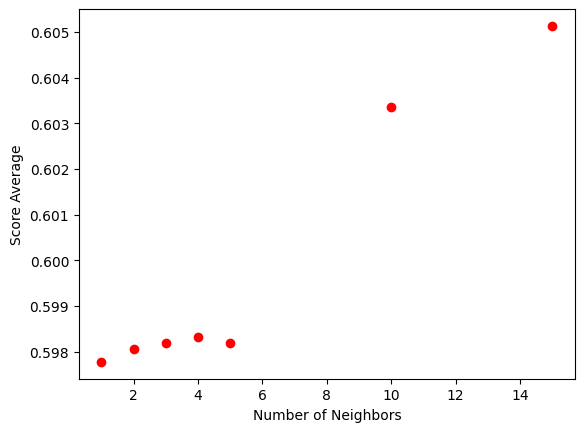

In [13]:
# TODO: ii. K-nearest neighbor (KNN) (k = 1, 2, 3, 4, 5, 10, 15)
def knn(num_neighbors, df, actual=False):
    accuracy = list()

    for n in num_neighbors:
        Y = df["Occupancy"]
        X = df.drop("Occupancy", axis=1)
        # Convert date to int
        X["date"] = pd.to_datetime(X["date"]).astype("int64")
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X,Y)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(n ,avg_score, "ro-")
            plt.xlabel("Number of Neighbors")
            plt.ylabel("Score Average")
        if actual:
            Y_pred = clf.predict(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            return conf_mat

num_neighbors = [1, 2, 3, 4, 5, 10, 15]
knn(num_neighbors, train_office_df)

[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811


/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811
[0.78503401 0.78488768 0.78488768 0.78488768 0.78556841] Average: 0.7850530927142811


/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

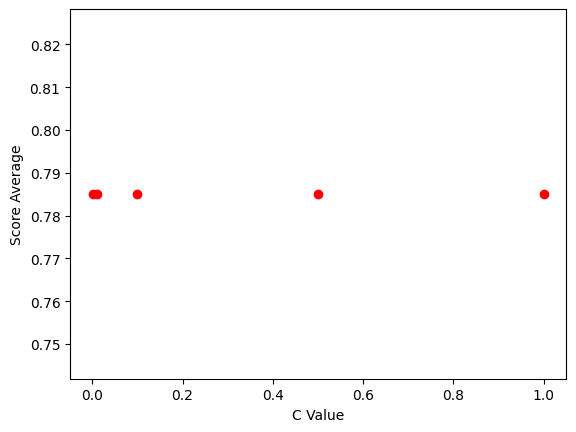

In [14]:
# TODO: iii. Logistic regression (LR) (C = 0.001, 0.01, 0.1, 0.5, 1)
def log_reg(c_values, df, actual=False):
    for c in c_values:
        Y = df["Occupancy"]
        X = df.drop("Occupancy", axis=1)
        # Convert date to int
        X["date"] = pd.to_datetime(X["date"]).astype("int64")
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)
        clf = linear_model.LogisticRegression(C=c)
        clf.fit(X,Y)
        if not actual:
            scores = cross_val_score(clf, X, Y, cv=5)
            avg_score = sum(scores)/len(scores)
            print(scores, "Average:", avg_score)
            plt.plot(c ,avg_score, "ro-")
            plt.xlabel("C Value")
            plt.ylabel("Score Average")
        if actual:
            Y_pred = clf.predict(X_test)
            conf_mat = confusion_matrix(Y_test, Y_pred)
            print(conf_mat)
            return conf_mat

c_values = [0.001, 0.01, 0.1, 0.5, 1]
log_reg(c_values, train_office_df)

In [15]:
def confusion_matrix_calculations(conf_mat):
    tp = conf_mat[1][1]
    tn = conf_mat[0][0]
    fp = conf_mat[0][1]
    fn = conf_mat[1][0]
    # Precision
    precision = tp / (tp + fp)
    # Recall
    recall = tp / (tp + fn)
    # F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    results = [precision, recall, f1]
    return results

In [20]:
# TODO: train a model on the entire train office.csv
decision_conf_mat = decision_tree([1], train_office_df, True)
decision_results = confusion_matrix_calculations(decision_conf_mat)
print("\nprecision:", decision_results[0], "\nrecall:", decision_results[1], "\nf1-score:", decision_results[2])

Depth: 1
[[4542   71]
 [   8 1256]]

precision: 0.9464958553127355 
recall: 0.9936708860759493 
f1-score: 0.9695098417599384


In [21]:
knn_conf_mat = knn([15], train_office_df, True)
knn_results = confusion_matrix_calculations(knn_conf_mat)
print("\nprecision:", knn_results[0], "\nrecall:", knn_results[1], "\nf1-score:", knn_results[2])

[[4591   22]
 [  10 1254]]

precision: 0.9827586206896551 
recall: 0.9920886075949367 
f1-score: 0.9874015748031496


In [22]:
log_conf_mat = log_reg([0.01], train_office_df, True)
log_results = confusion_matrix_calculations(log_conf_mat)
print("\nprecision:", log_results[0], "\nrecall:", log_results[1], "\nf1-score:", log_results[2])

[[4613    0]
 [1264    0]]

precision: nan 
recall: 0.0 
f1-score: nan


/Users/paulsemadeni/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/ly/1cz6zr7x4w17ks9hj2qgbkvh0000gp/T/ipykernel_48612/593156633.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
